## Recap Of Data Science Problem

The purpose of this data science project is to come up with a pricing model for diamonds in the diamond market. Using historical prices of diamonds for a business case, I can use a dataset to understand price and other features related to diamonds and also help others make future predictions in a more reliable way than just using the historical price. There is also a huge lack of knowing what is the fair value for a diamond to the public. In particular, which ones we are most likely to pay more for. This project aims to build a predictive model for diamond price based on a number of features, or properties industry standard diamonds. This model will be used to provide guidance for diamond pricing and future value investment plans.

## Imports

In [1]:
# For Data defining via pandas-profiling
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

from pandas_profiling import ProfileReport

%matplotlib inline

## Objectives

There are fundamental questions that should align with objectives for the dataset before moving on.
* Do I have the data I need to tackle the data science problem?
    * Have I identified the required target value?
* Do I have potentially useful features?
* Do I have any fundamental issues with the data?

## Load Diamond Dataset

Loading is the first step with the data but joining is not needed as I am only working with one dataset.

In [3]:
raw_data = "../data/raw/Diamond Price Prediction.csv"
diamond_data = pd.read_csv(raw_data)

# Checking shape for verification (should match ten features)
diamond_data.shape

(53940, 10)

In [4]:
#Call the info method on diamond_data to see a summary of the data
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


"Price(in US dollars)" is the price of the diamonds. The diamond price per observation is what is being modeled. The other columns are potential features. The data also shows that some column types are objects, while most of them are floats and one is an integer type.

## Data Definition
The goal of building data definitions is to describe the features in the dataset with enough detail to:
   * Identify any issues that will require cleaning
   * Identify the features of your dataset
   * Begin to understand how the inlcluded features will support the data science problem I listed above

In [5]:
# Generate result using ProfileReport
profile = ProfileReport(diamond_data, title = "Pandas Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#Display results
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Save Report as deliverable
profile.to_file("../reports/diamond_profile_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In the overview we can see that there are 10 variables/features in total with 7 that are numeric and 3 that are categorical.The total number of observations is 53940. That is a huge dataset with a good amount of rows/observations. There are no missing cells which can be a problem for cleaning sometimes but there are 143 duplicate rows. The total percentage of the dataset of duplicate rows is 0.30%. This could be a problem but it apears small enough to not worry about.

Things we need to explore are the following:

* Column names
* Data types
* Description of the columns
* Counts unique values
* Ranges of values

### Column names

So the first thing we want to do is take a look at the variables and column names. Right away we can see that the data according to the profile report has many high level correlations.

In [8]:
#Call the head method on diamond_data to print the first several rows of the data
diamond_data.head()

Carat(Weight of Daimond) Cut(Quality) Color Clarity  Depth  Table  \
0                      0.23        Ideal     E     SI2   61.5   55.0   
1                      0.21      Premium     E     SI1   59.8   61.0   
2                      0.23         Good     E     VS1   56.9   65.0   
3                      0.29      Premium     I     VS2   62.4   58.0   
4                      0.31         Good     J     SI2   63.3   58.0   

   Price(in US dollars)  X(length)  Y(width)  Z(Depth)  
0                   326       3.95      3.98      2.43  
1                   326       3.89      3.84      2.31  
2                   327       4.05      4.07      2.31  
3                   334       4.20      4.23      2.63  
4                   335       4.34      4.35      2.75

The column names also correspond to what those columns store very well. However, they can be improved.

In [9]:
diamond_data.columns = ['carat_weight', 'cut_quality', 'color', 'clarity', 'diamond_depth', 'table', 'price', 'length', 'width', 'depth']
diamond_data.head()

carat_weight cut_quality color clarity  diamond_depth  table  price  \
0          0.23       Ideal     E     SI2           61.5   55.0    326   
1          0.21     Premium     E     SI1           59.8   61.0    326   
2          0.23        Good     E     VS1           56.9   65.0    327   
3          0.29     Premium     I     VS2           62.4   58.0    334   
4          0.31        Good     J     SI2           63.3   58.0    335   

   length  width  depth  
0    3.95   3.98   2.43  
1    3.89   3.84   2.31  
2    4.05   4.07   2.31  
3    4.20   4.23   2.63  
4    4.34   4.35   2.75

As we can now see the dataset is much tidyier and digestible

### Data types

All the data types appear to produce accurate statistics for the correct columns. 

In [10]:
#Viewing info of df to verify profile report of data types
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat_weight   53940 non-null  float64
 1   cut_quality    53940 non-null  object 
 2   color          53940 non-null  object 
 3   clarity        53940 non-null  object 
 4   diamond_depth  53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   length         53940 non-null  float64
 8   width          53940 non-null  float64
 9   depth          53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Description of the columns

Summary statistics for each of the seven numerical columns, includes mean, median, mode, standard deviation, and range. The highest number of unique values is pulled for the categorical features/columns.

The original columns for Carat(Weight of Daimond), Price(in US dollars, X(length), Y(width), Z(Depth) all appear to have the highest correlations and are all numerical according to statistics created on the data. Cut(Quality) and Table are the next features that have the highest correlations but significantly lower than the features mentioned above.            

In [11]:
# Statistical representation of dataset
diamond_data.describe()

carat_weight  diamond_depth         table         price        length  \
count  53940.000000   53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940      61.749405     57.457184   3932.799722      5.731157   
std        0.474011       1.432621      2.234491   3989.439738      1.121761   
min        0.200000      43.000000     43.000000    326.000000      0.000000   
25%        0.400000      61.000000     56.000000    950.000000      4.710000   
50%        0.700000      61.800000     57.000000   2401.000000      5.700000   
75%        1.040000      62.500000     59.000000   5324.250000      6.540000   
max        5.010000      79.000000     95.000000  18823.000000     10.740000   

              width         depth  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

### Ranges of values

There does not appear to be any strange areas in the data except the minimum amounts of lenght, width, and depth at 0. The largest value of any column significantly is the price for 18,823.

### Count unique values

In [12]:
# Count to verify no missing observations
diamond_data.count()

carat_weight     53940
cut_quality      53940
color            53940
clarity          53940
diamond_depth    53940
table            53940
price            53940
length           53940
width            53940
depth            53940
dtype: int64

In [13]:
# Explore column for unique value counts
diamond_data.nunique()

carat_weight       273
cut_quality          5
color                7
clarity              8
diamond_depth      184
table              127
price            11602
length             554
width              552
depth              375
dtype: int64

In [14]:
diamond_data.head()

carat_weight cut_quality color clarity  diamond_depth  table  price  \
0          0.23       Ideal     E     SI2           61.5   55.0    326   
1          0.21     Premium     E     SI1           59.8   61.0    326   
2          0.23        Good     E     VS1           56.9   65.0    327   
3          0.29     Premium     I     VS2           62.4   58.0    334   
4          0.31        Good     J     SI2           63.3   58.0    335   

   length  width  depth  
0    3.95   3.98   2.43  
1    3.89   3.84   2.31  
2    4.05   4.07   2.31  
3    4.20   4.23   2.63  
4    4.34   4.35   2.75

In [15]:
# Reassigning diamond dataset for easier managing
df = diamond_data.copy()
df

carat_weight cut_quality color clarity  diamond_depth  table  price  \
0              0.23       Ideal     E     SI2           61.5   55.0    326   
1              0.21     Premium     E     SI1           59.8   61.0    326   
2              0.23        Good     E     VS1           56.9   65.0    327   
3              0.29     Premium     I     VS2           62.4   58.0    334   
4              0.31        Good     J     SI2           63.3   58.0    335   
...             ...         ...   ...     ...            ...    ...    ...   
53935          0.72       Ideal     D     SI1           60.8   57.0   2757   
53936          0.72        Good     D     SI1           63.1   55.0   2757   
53937          0.70   Very Good     D     SI1           62.8   60.0   2757   
53938          0.86     Premium     H     SI2           61.0   58.0   2757   
53939          0.75       Ideal     D     SI2           62.2   55.0   2757   

       length  width  depth  
0        3.95   3.98   2.43  
1        3.89   3.84   2.31  
2        4.05   4.07   2.31  
3        4.20   4.23   2.63  
4        4.34   4.35   2.75  
...       ...    ...    ...  
53935    5.75   5.76   3.50  
53936    5.69   5.75   3.61  
53937    5.66   5.68   3.56  
53938    6.15   6.12   3.74  
53939    5.83   5.87   3.64  

[53940 rows x 10 columns]

In [16]:
df.cut_quality.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

According to the data and our business case goals, it appears the best label to use for comparison of observations is the "cut_quality".

In [17]:
quality = df.cut_quality.value_counts()
quality

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut_quality, dtype: int64

In [18]:
# Using 'Ideal' as the cut_quality of interest 
df[df.cut_quality == 'Ideal'].T

0      11     13     16     39     40     41     51     52     \
carat_weight    0.23   0.23   0.31    0.3   0.33   0.33   0.33   0.23   0.32   
cut_quality    Ideal  Ideal  Ideal  Ideal  Ideal  Ideal  Ideal  Ideal  Ideal   
color              E      J      J      I      I      I      J      G      I   
clarity          SI2    VS1    SI2    SI2    SI2    SI2    SI1    VS1    SI1   
diamond_depth   61.5   62.8   62.2   62.0   61.8   61.2   61.1   61.9   60.9   
table           55.0   56.0   54.0   54.0   55.0   56.0   56.0   54.0   55.0   
price            326    340    344    348    403    403    403    404    404   
length          3.95   3.93   4.35   4.31   4.49   4.49   4.49   3.93   4.45   
width           3.98    3.9   4.37   4.34   4.51    4.5   4.55   3.95   4.48   
depth           2.43   2.46   2.71   2.68   2.78   2.75   2.76   2.44   2.72   

               55     ...  53900  53915  53919  53923  53924  53925  53926  \
carat_weight     0.3  ...   0.73   0.77   0.76   0.73   0.73   0.79   0.71   
cut_quality    Ideal  ...  Ideal  Ideal  Ideal  Ideal  Ideal  Ideal  Ideal   
color              I  ...      H      E      I      I      I      I      E   
clarity          SI2  ...    VS2    SI2   VVS1    VS2    VS2    SI1    SI1   
diamond_depth   61.0  ...   62.5   62.1   62.2   61.3   61.6   61.6   61.9   
table           59.0  ...   58.0   56.0   55.0   56.0   55.0   56.0   56.0   
price            405  ...   2752   2753   2753   2756   2756   2756   2756   
length           4.3  ...   5.71   5.84   5.89    5.8   5.82   5.95   5.71   
width           4.33  ...   5.75   5.86   5.87   5.84   5.84   5.97   5.73   
depth           2.63  ...   3.58   3.63   3.66   3.57   3.59   3.67   3.54   

               53929  53935  53939  
carat_weight    0.71   0.72   0.75  
cut_quality    Ideal  Ideal  Ideal  
color              G      D      D  
clarity          VS1    SI1    SI2  
diamond_depth   61.4   60.8   62.2  
table           56.0   57.0   55.0  
price           2756   2757   2757  
length          5.76   5.75   5.83  
width           5.73   5.76   5.87  
depth           3.53    3.5   3.64  

[10 rows x 21551 columns]

That is a great note we can use later.

## Data Cleaning

In the data cleaning process we will be going over the following:
* NA or missing values
* Duplicates

#### NA or missing values


In [19]:
# Sampling data for proper representation
df.sample(5)

carat_weight cut_quality color clarity  diamond_depth  table  price  \
50083          0.76   Very Good     J     VS2           61.2   57.0   2206   
14417          1.05     Premium     E     SI1           61.8   56.0   5821   
28640          0.33       Ideal     G     SI2           61.9   56.0    434   
1492           0.72   Very Good     E     VS2           62.9   57.0   2990   
35268          0.30   Very Good     G      IF           62.8   57.0    895   

       length  width  depth  
50083    5.86   5.91   3.60  
14417    6.57   6.50   4.04  
28640    4.41   4.45   2.74  
1492     5.68   5.73   3.59  
35268    4.28   4.32   2.70

In [20]:
# Sampling data for proper representation again
df.sample(20)

carat_weight cut_quality color clarity  diamond_depth  table  price  \
43483          0.47       Ideal     G    VVS1           61.6   56.0   1421   
44125          0.50     Premium     E     VS2           62.6   58.0   1559   
34220          0.40       Ideal     H     SI1           62.0   56.0    855   
15579          1.03       Ideal     D     SI1           61.9   57.0   6250   
11458          1.14     Premium     F     SI2           60.8   58.0   5008   
51660          0.71   Very Good     E     SI2           62.7   59.0   2397   
9071           1.03       Ideal     H     SI1           62.3   56.0   4520   
46077          0.52       Ideal     G     VS2           61.3   56.0   1737   
36725          0.32       Ideal     E    VVS1           60.9   57.0    954   
21100          1.00     Premium     D    VVS2           58.3   61.0   9274   
26771          2.06   Very Good     F     SI2           61.5   56.0  16603   
27922          0.26   Very Good     D     SI1           59.7   58.0    658   
40309          0.40       Ideal     E     VS1           62.6   56.0   1125   
32577          0.41       Ideal     G     VS2           60.7   56.0    801   
5174           1.04     Premium     I     SI2           62.0   57.0   3774   
2166           0.82       Ideal     E     SI2           62.6   55.0   3131   
53241          0.59       Ideal     E    VVS2           62.0   55.0   2643   
31653          0.35     Premium     E     VS2           60.9   59.0    767   
38768          0.31       Ideal     F      IF           61.8   54.0   1046   
12464          1.27       Ideal     I     SI2           62.1   56.0   5249   

       length  width  depth  
43483    4.99   5.05   3.09  
44125    5.07   5.12   3.19  
34220    4.74   4.68   2.92  
15579    6.52   6.54   4.04  
11458    6.79   6.74   4.11  
51660    5.70   5.75   3.59  
9071     6.45   6.48   4.03  
46077    5.18   5.21   3.18  
36725    4.42   4.45   2.70  
21100    6.55   6.48   3.80  
26771    8.15   8.18   5.02  
27922    4.16   4.22   2.50  
40309    4.72   4.67   2.94  
32577    4.77   4.82   2.91  
5174     6.53   6.47   4.03  
2166     5.94   5.98   3.73  
53241    5.36   5.41   3.34  
31653    4.54   4.56   2.77  
38768    4.37   4.33   2.69  
12464    6.96   6.92   4.31

As we can expect there is still no missing values.

In [21]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

carat_weight     0
cut_quality      0
color            0
clarity          0
diamond_depth    0
table            0
price            0
length           0
width            0
depth            0
dtype: int64

In [22]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.0

Next we could using the Missingno package for extra verification of any missing data. 
>Missingno (saved as msno) is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe. This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram. 

From these plots, we can identify where missing values occur, the extent of the missingness and whether any of the missing values are correlated with each other. Often, missing values may be seen as not contributing any information, but if analysed closely there may be an underlying story.

<AxesSubplot:>

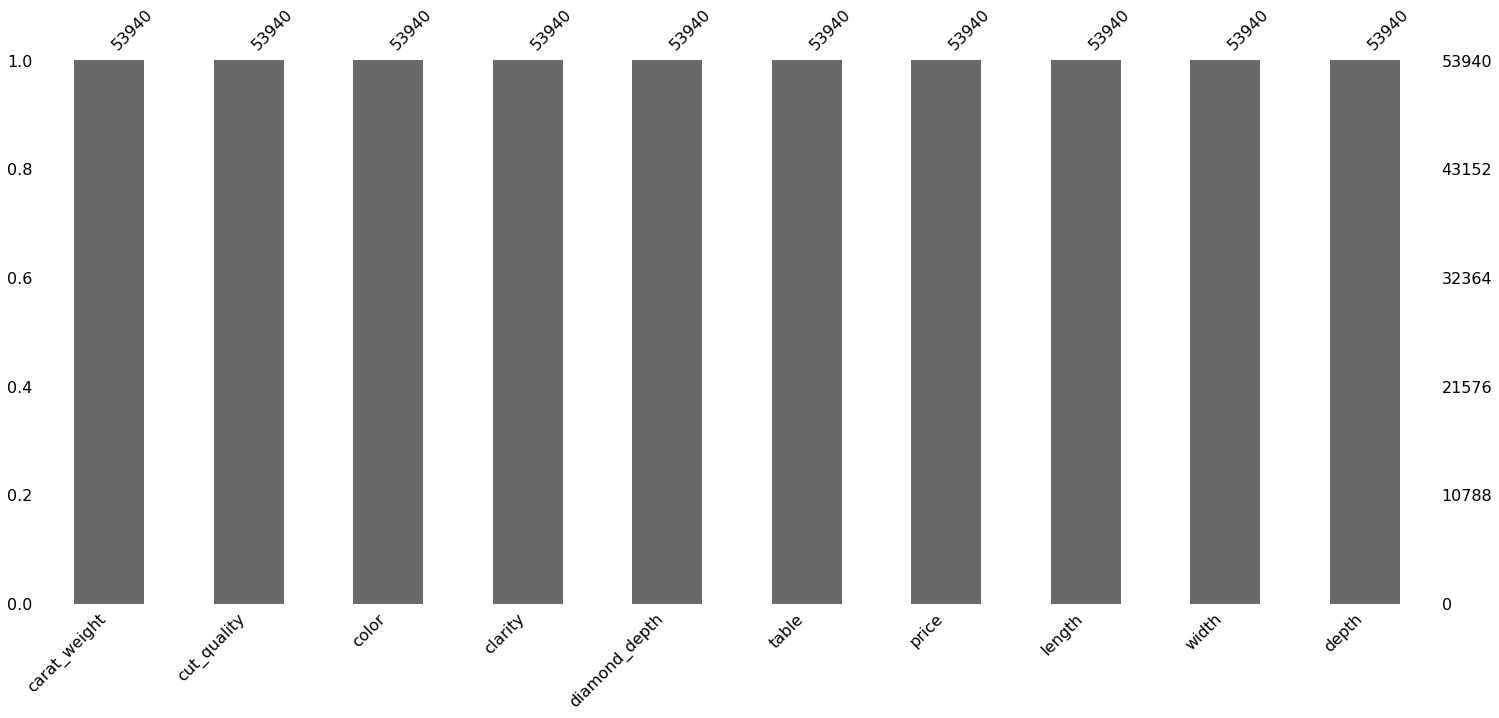

In [23]:
msno.bar(df)

<AxesSubplot:>

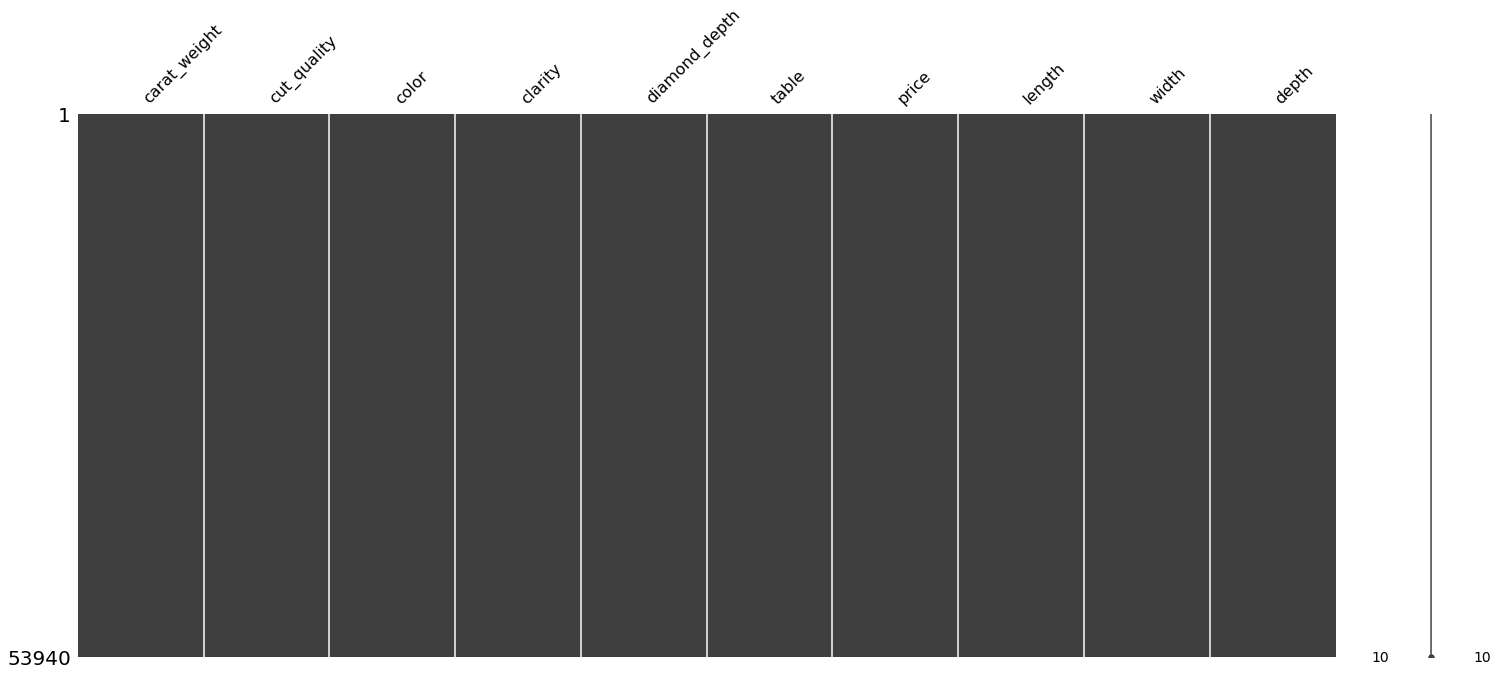

In [24]:
msno.matrix(df)

It is very clear that there is no missing data in this dataframe.

#### Duplicates

As mentioned above and after viewing the profile report, there are still 143 duplicate rows. The total percentage of the dataset of duplicate rows is 0.30%. That is a small percentage of the data.

In [30]:
quality

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut_quality, dtype: int64

In [26]:
quality.sum()

53940

In [27]:
quality.sum() == df.shape[0]

True

In [28]:
df.groupby('cut_quality')['carat_weight'].value_counts()

cut_quality  carat_weight
Fair         1.00            166
             0.70            137
             1.01            125
             0.90            104
             0.50             80
                            ... 
Very Good    2.68              1
             2.70              1
             3.00              1
             3.04              1
             4.00              1
Name: carat_weight, Length: 1098, dtype: int64

In [29]:
df.groupby('cut_quality')['clarity'].value_counts()

cut_quality  clarity
Fair         SI2         466
             SI1         408
             VS2         261
             I1          210
             VS1         170
             VVS2         69
             VVS1         17
             IF            9
Good         SI1        1560
             SI2        1081
             VS2         978
             VS1         648
             VVS2        286
             VVS1        186
             I1           96
             IF           71
Ideal        VS2        5071
             SI1        4282
             VS1        3589
             VVS2       2606
             SI2        2598
             VVS1       2047
             IF         1212
             I1          146
Premium      SI1        3575
             VS2        3357
             SI2        2949
             VS1        1989
             VVS2        870
             VVS1        616
             IF          230
             I1          205
Very Good    SI1        3240
             VS2      